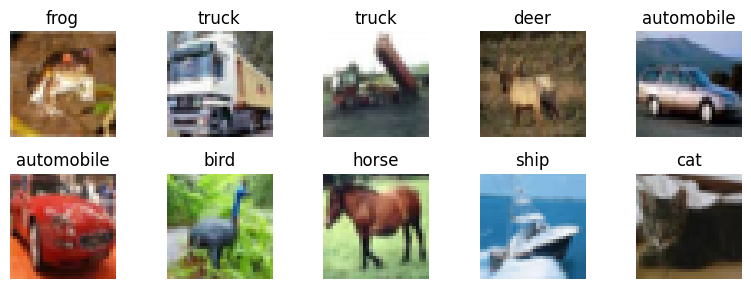


Training CNN on CIFAR-10 dataset...
Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 69s 186ms/step - accuracy: 0.2668 - loss: 1.9480 - val_accuracy: 0.4772 - val_loss: 1.4239
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 83s 189ms/step - accuracy: 0.4740 - loss: 1.4496 - val_accuracy: 0.5368 - val_loss: 1.2952
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 80s 184ms/step - accuracy: 0.5407 - loss: 1.2800 - val_accuracy: 0.5734 - val_loss: 1.1743
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 82s 184ms/step - accuracy: 0.5894 - loss: 1.1614 - val_accuracy: 0.6230 - val_loss: 1.0396
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 64s 181ms/step - accuracy: 0.6294 - loss: 1.0559 - val_accuracy: 0.6598 - val_loss: 0.9845
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 83s 183ms/step - accuracy: 0.6498 - loss: 0.9950 - val_accuracy: 0.6760 - val_loss: 0.9187
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 82s 183ms/step - accuracy: 0.6742 - loss: 0.9279 - val_accuracy: 0.6914 - val_loss: 0.8744
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 68s 19

Saving download (3).jpeg to download (3) (1).jpeg

Uploaded file: download (3) (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


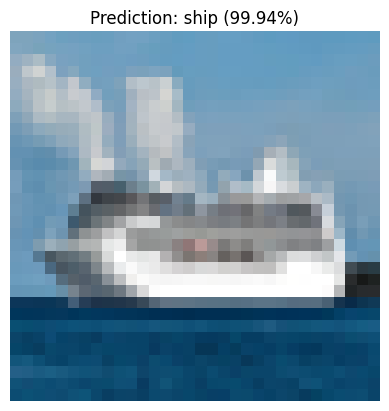


Predicted Class: ship
Confidence: 99.94%


In [ ]:
# ===========================================================
# CNN IMAGE CLASSIFIER (CIFAR-10) — USER UPLOAD VERSION
# ===========================================================

from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# ===========================================================
# 1. LOAD AND PREPARE CIFAR-10 DATA
# ===========================================================
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# CIFAR-10 Class Names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Show sample images
plt.figure(figsize=(8, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

# ===========================================================
# 2. BUILD THE CNN MODEL
# ===========================================================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("\nTraining CNN on CIFAR-10 dataset...")
model.fit(x_train, y_train, validation_split=0.1, epochs=10, batch_size=128, verbose=1)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

# ===========================================================
# 3. UPLOAD USER IMAGE
# ===========================================================
print("\nPlease upload an image (JPG or PNG) for classification...")
uploaded = files.upload()

# Get uploaded filename
filename = list(uploaded.keys())[0]
print(f"\nUploaded file: {filename}")

# ===========================================================
# 4. PREPROCESS THE IMAGE
# ===========================================================
img = Image.open(filename).convert('RGB')
img = img.resize((32, 32))
img_arr = np.array(img).astype('float32') / 255.0
img_arr = np.expand_dims(img_arr, axis=0)

# ===========================================================
# 5. PREDICT IMAGE CLASS
# ===========================================================
predictions = model.predict(img_arr)
pred_class = np.argmax(predictions)
confidence = np.max(predictions) * 100

# ===========================================================
# 6. DISPLAY RESULT
# ===========================================================
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {class_names[pred_class]} ({confidence:.2f}%)")
plt.show()

print(f"\nPredicted Class: {class_names[pred_class]}")
print(f"Confidence: {confidence:.2f}%")
